In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [115]:
# loading the data
df = pd.read_csv('spam.csv', encoding='latin-1')

In [116]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [117]:
# chceking the null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [118]:
# extracting the colums names which has null values
df.columns[df.isnull().any()]

Index(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [119]:
# Dopping unwanted columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1,inplace=True)

In [120]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [121]:
# lets check the null value
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [122]:
# lets change the column name
df.rename(columns={
    'v1':'label',
    'v2':'mail'
}, inplace=True)

In [123]:
df

,label,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   mail    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


The provided information is the summary of a DataFrame object from the pandas library in Python. Here is an explanation of the observations:

- RangeIndex: The DataFrame has 5572 entries or rows, numbered from 0 to 5571.
- Data columns: There are two columns in the DataFrame, named "Label" and "mail".
- Column details:
  - The "Label" column has 5572 non-null values and its data type is object. The "non-null count" indicates that there are no missing values (nulls) in this column.
  - The "mail" column also has 5572 non-null values and its data type is object.
- Memory usage: The DataFrame is consuming approximately 87.2 KB of memory.

Overall, this DataFrame contains 5572 rows of data with two columns, "Label" and "mail", both of which have object data types. There are no missing values in either column, and the DataFrame's memory usage is 87.2 KB.

In [125]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

*As you can the the distribution for the above class is clearly imbalanced So here different ways you can deal with such Imbalanced Situationn and those are as follows:*

**1.Undersampling - where you reduce the majority class and make it equal to minority class which is "spam". which will cause you loss in data.**

**2.Oversamplng - which will provide some random records from the majority class - "Ham" to minority class - "spam", but this will cause in duplicated records and due to which you will issue of Oversampling.**

**3.Startify - which uses same amount of data from both the classes but using this strategy in this scenario will not make any sense"**

**4.SMOTE - So, to overcome such scenarios of imbalanced data which can also cause issue like overfitting it better that you chose "Smote" technique which help you target on minority class,which inthis case is 'spam' class**

***what 'SMOTE' does is that it will randomly choose a observation from the spam class and will apply knn working on it by choosing some nearest neighbours, so lets assume that we got 3 nearest neighbours, so why we are doing this because we want to generate a new observation which is slightly different from our original because if we have same records then it will be marked as duplicate.So, by calculating   the distance from orginal observation to one of the nearest neighbour will get a new generated observation which lie between them (original observation of spam and nearest neighbour of spam and this process will continue, until and unless we reach to a point where our minority class becomes as eaual as majority then after doing the data get balanced.***

In [126]:
df

,label,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for plotting Visual
import seaborn as sns # for plotting Visual
import re # Regex Library
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download("punkt") # package consist of punctuation marks
nltk.download("wordnet") #
nltk.download("stopwords") # list of Stopwords

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.stem import WordNetLemmatizer #
from wordcloud import WordCloud # Word Visualization


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [128]:
# this function includes
# 1. Lower conversion
# 2. considering only alphabets
# 3. removing Stopwords from the given sentence.
# 4. Removing prefix and sufix using Stemming or Lemmatization method.
# 5. And Lastly, joining all the words and setting it as a Sentence.
def cleantext(text):
    # text = re.sub(r'@[A-Za-z0-9()]+','',text)
    tokens = word_tokenize(text.lower())
    ftoken = [t for t in tokens if(t.isalpha())]
    stop = stopwords.words("english")
    ctoken = [t for t in ftoken if(t not in stop)]
    lemma = WordNetLemmatizer()
    ltoken = [lemma.lemmatize(t) for t in ctoken]
    return " ".join(ltoken)

In [129]:
df["clean_mail"]=df["mail"].apply(cleantext)

In [130]:
df['mail'].values[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [131]:
df['clean_mail'].values[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [132]:
df

,label,mail,clean_mail
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time tried contact u pound prize claim easy ca...
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [133]:
sentlen = []

for sent in df['mail']:
    sentlen.append(len(word_tokenize(sent)))

df['maillen'] = sentlen

In [134]:
df

,label,mail,clean_mail,maillen
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,24
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...,37
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,15
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time tried contact u pound prize claim easy ca...,35
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home,9
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion,15
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,27


In [135]:
sentlen = []

for sent in df['clean_mail']:
    sentlen.append(len(word_tokenize(sent)))

df['clean_maillen'] = sentlen

In [136]:
df

,label,mail,clean_mail,maillen,clean_maillen
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,24,16
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,8,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...,37,20
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,13,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,15,7
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time tried contact u pound prize claim easy ca...,35,11
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home,9,5
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion,15,3
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,27,13


<Axes: xlabel='maillen', ylabel='Density'>

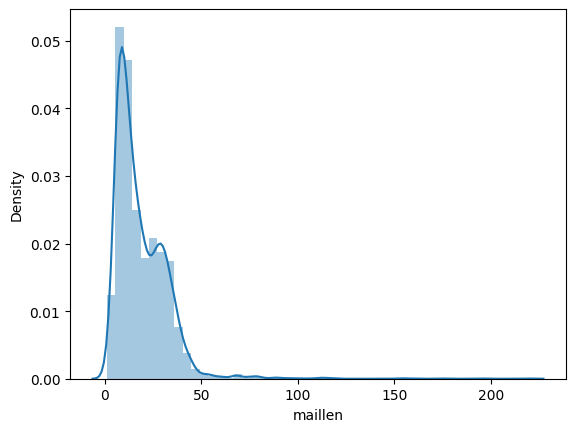

In [137]:
sns.distplot(df['maillen'])

<Axes: xlabel='clean_maillen', ylabel='Density'>

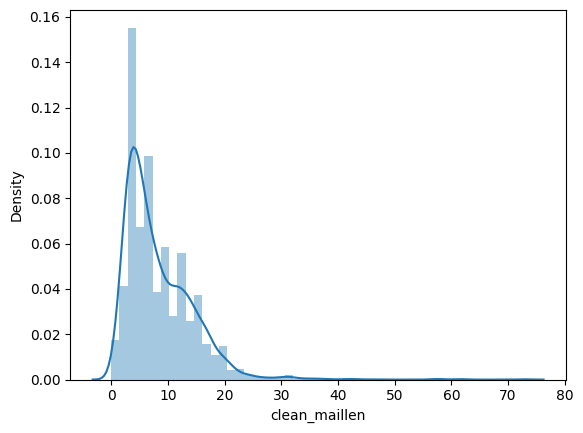

In [138]:
sns.distplot(df['clean_maillen'])

In [139]:
df[['maillen','clean_maillen']].describe()

,maillen,clean_maillen
count,5572.000000,5572.000000
mean,18.699390,8.369885
std,13.741932,6.096494
min,1.000000,0.000000
25%,9.000000,4.000000
50%,15.000000,7.000000
75%,27.000000,12.000000
max,220.000000,73.000000


### How to change the index position of a column.
To change the index position of a column using pandas, you can utilize the `reindex()` method. Here's an example of how you can achieve this:

```python
import pandas as pd

# Assuming 'df' is your DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})

# Current column order: ['A', 'B', 'C']

# Reorder the columns by changing the index position of 'C' to the beginning
df = df.reindex(['C', 'A', 'B'], axis=1)

# Updated column order: ['C', 'A', 'B']
```

In this example, the `reindex()` method is used to change the index position of the columns. The `reindex()` method accepts the desired order of columns as a list and specifies the `axis=1` parameter to indicate that we are reordering the columns. By reindexing the DataFrame columns, you can change their index positions according to the specified order.

In [140]:
df.columns

Index(['label', 'mail', 'clean_mail', 'maillen', 'clean_maillen'], dtype='object')

In [141]:
df = df.reindex(['mail', 'maillen', 'clean_mail', 'clean_maillen','label'], axis = 1)

In [142]:
df

,mail,maillen,clean_mail,clean_maillen,label
0,"Go until jurong point, crazy.. Available only ...",24,go jurong point crazy available bugis n great ...,16,ham
1,Ok lar... Joking wif u oni...,8,ok lar joking wif u oni,6,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,37,free entry wkly comp win fa cup final tkts may...,20,spam
3,U dun say so early hor... U c already then say...,13,u dun say early hor u c already say,9,ham
4,"Nah I don't think he goes to usf, he lives aro...",15,nah think go usf life around though,7,ham
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,35,time tried contact u pound prize claim easy ca...,11,spam
5568,Will Ì_ b going to esplanade fr home?,9,b going esplanade fr home,5,ham
5569,"Pity, * was in mood for that. So...any other s...",15,pity mood suggestion,3,ham
5570,The guy did some bitching but I acted like i'd...,27,guy bitching acted like interested buying some...,13,ham


In [143]:
df['clean_maillen'].describe()

count    5572.000000
mean        8.369885
std         6.096494
min         0.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        73.000000
Name: clean_maillen, dtype: float64

In [144]:
df1 = df.iloc[:,2:]

In [145]:
df1

,clean_mail,clean_maillen,label
0,go jurong point crazy available bugis n great ...,16,ham
1,ok lar joking wif u oni,6,ham
2,free entry wkly comp win fa cup final tkts may...,20,spam
3,u dun say early hor u c already say,9,ham
4,nah think go usf life around though,7,ham
...,...,...,...
5567,time tried contact u pound prize claim easy ca...,11,spam
5568,b going esplanade fr home,5,ham
5569,pity mood suggestion,3,ham
5570,guy bitching acted like interested buying some...,13,ham


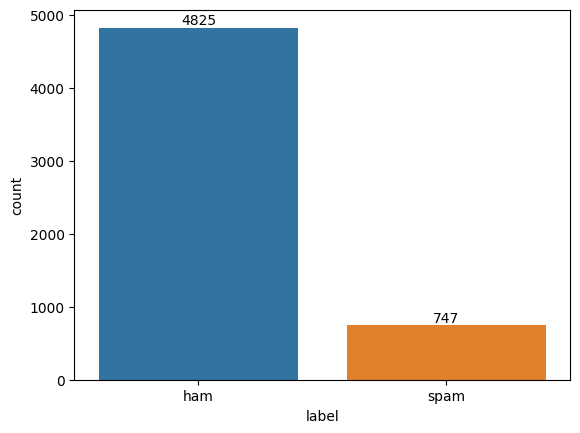

In [146]:
ax=sns.countplot(data=df1,x='label');
for container in ax.containers:
    ax.bar_label(container)

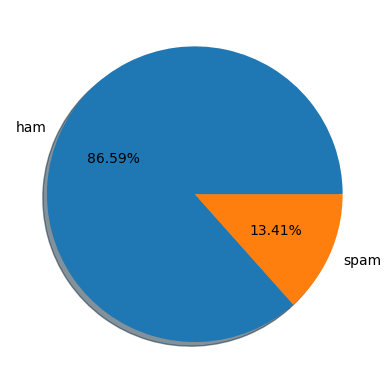

In [147]:
plt.pie(df1.label.value_counts(),
        autopct = "%1.2f%%",shadow=True,labels=df['label'].unique());

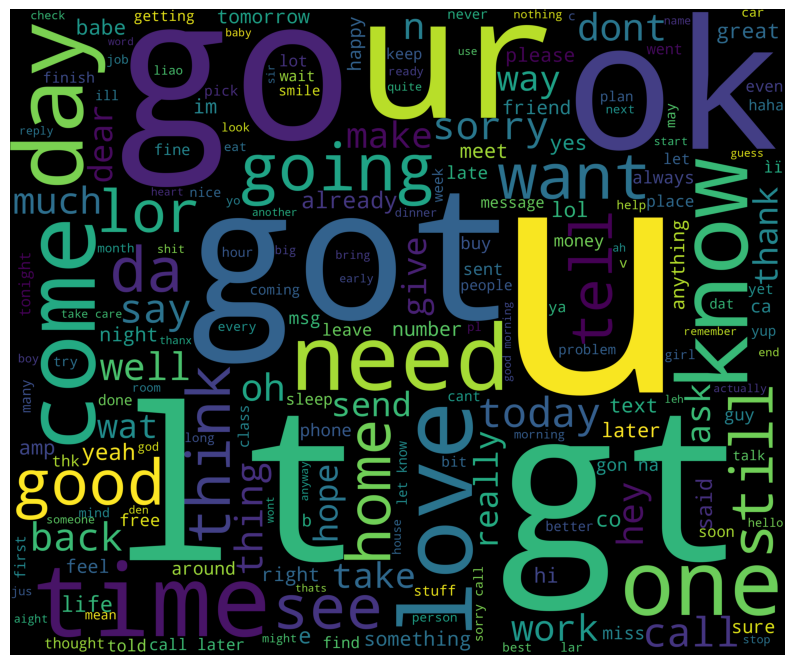

In [148]:
wc=WordCloud(background_color='black',width=3000, height=2500)

wc.generate(" ".join(df1[df1["label"]=="ham"]["clean_mail"]))
plt.figure(figsize=(10,10))
#img=word.to_image()
#img.show()
plt.imshow(wc)
plt.axis("off")
plt.show()

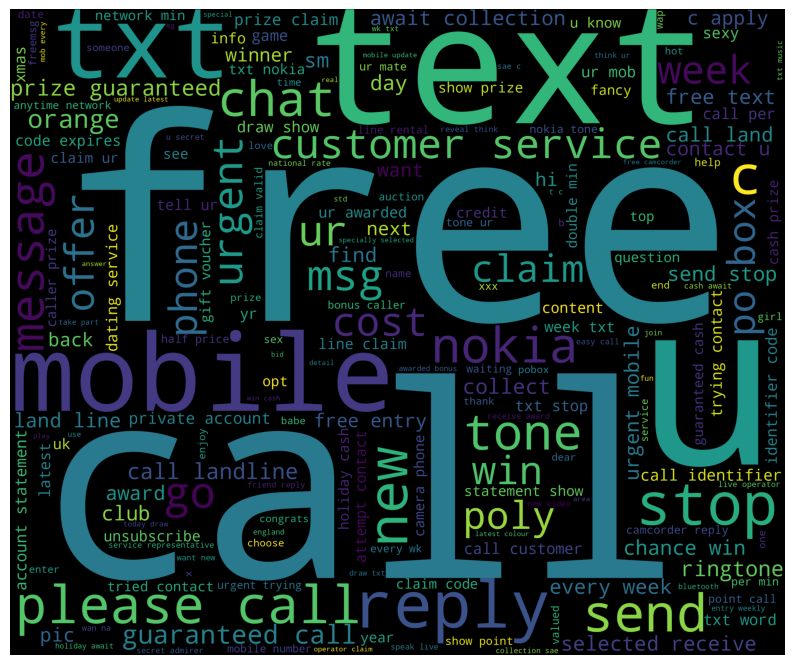

In [149]:
wc=WordCloud(background_color='black',width=3000, height=2500)

wc.generate(" ".join(df1[df1["label"]=="spam"]["clean_mail"]))
plt.figure(figsize=(10,10))
#img=word.to_image()
#img.show()
plt.imshow(wc)
plt.axis("off")
plt.show()

## Whenever the data is imbalanced will always look for F1 Score not the Accuracy.

In [150]:
df1['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [151]:
df1[df1['clean_maillen']==0]

,clean_mail,clean_maillen,label
252,,0,ham
959,,0,ham
1611,,0,ham
2805,,0,ham
3092,,0,ham
3374,,0,ham
3740,,0,spam
4115,,0,ham
4291,,0,ham
4573,,0,ham


In [152]:
df1[df1['clean_maillen']==0].index

Int64Index([252, 959, 1611, 2805, 3092, 3374, 3740, 4115, 4291, 4573, 4822,
            4885, 5268],
           dtype='int64')

In [153]:
df1.drop(index = df1[df1['clean_maillen']==0].index,axis = 0, inplace = True)

In [154]:
df1[df1['clean_maillen']==0].index

Int64Index([], dtype='int64')

In [160]:
x = df1['clean_mail']
x

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: clean_mail, Length: 5559, dtype: object

In [161]:
y = df1['label']
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5559, dtype: object

In [162]:
from sklearn.feature_extraction.text import CountVectorizer

In [163]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(x).toarray()

In [164]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [167]:
x.shape

(5559, 6630)

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [170]:
5572*70/100

3900.4

In [171]:
xtrain.shape

(3891, 6630)

In [172]:
ytrain.shape

(3891,)

In [173]:
5572*30/100

1671.6

In [174]:
xtest.shape

(1668, 6630)

In [175]:
ytest.shape

(1668,)

In [176]:
ytrain.value_counts()

ham     3377
spam     514
Name: label, dtype: int64

In [177]:
ytest.value_counts()

ham     1436
spam     232
Name: label, dtype: int64

In [178]:
# build Logistics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [179]:
xtraincv = xtrain
xtestcv = xtest

In [180]:
def mymodel(model):
    model.fit(xtraincv,ytrain)
    ypred = model.predict(xtestcv)

    train = model.score(xtraincv,ytrain)
    test = model.score(xtestcv,ytest)

    print(f"Training Accuracy:- {train}\n Testing Accuracy:-  {test}")
    print(classification_report(ytest,ypred))
    sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="YlGnBu")
    plt.xlabel('Predicted Label',size=15)
    plt.ylabel('True Lable',size=15)

    return model

Training Accuracy:- 0.9946029298380878
 Testing Accuracy:-  0.9730215827338129
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1436
        spam       0.98      0.82      0.89       232

    accuracy                           0.97      1668
   macro avg       0.98      0.91      0.94      1668
weighted avg       0.97      0.97      0.97      1668



LogisticRegression()

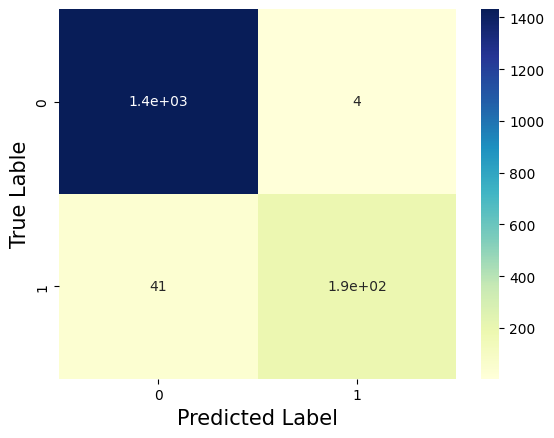

In [181]:
lr = LogisticRegression()
mymodel(lr)

Training Accuracy:- 0.9953739398612182
 Testing Accuracy:-  0.9748201438848921
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1436
        spam       0.98      0.84      0.90       232

    accuracy                           0.97      1668
   macro avg       0.98      0.92      0.94      1668
weighted avg       0.97      0.97      0.97      1668



LogisticRegression(C=1, max_iter=200, solver='liblinear')

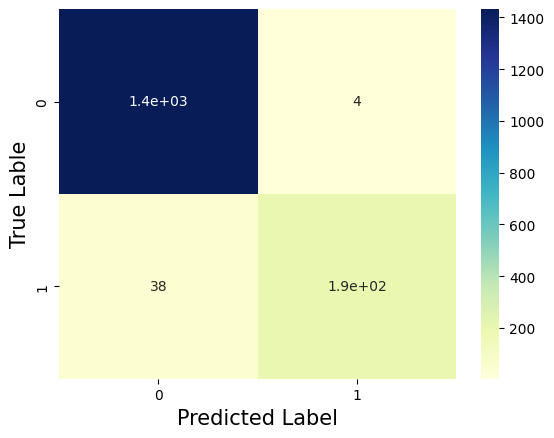

In [182]:
lr=LogisticRegression(C=1, solver="liblinear",max_iter=200)
mymodel(lr)


Training Accuracy:- 0.9753276792598303
 Testing Accuracy:-  0.9622302158273381
              precision    recall  f1-score   support

         ham       0.96      0.99      0.98      1436
        spam       0.95      0.77      0.85       232

    accuracy                           0.96      1668
   macro avg       0.96      0.88      0.91      1668
weighted avg       0.96      0.96      0.96      1668



BernoulliNB()

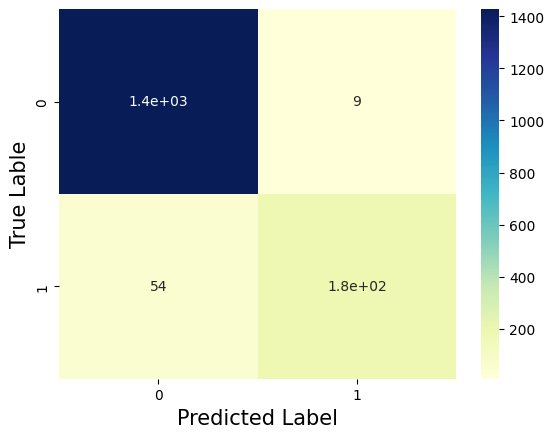

In [183]:
bnb=BernoulliNB()
mymodel(bnb)

Training Accuracy:- 0.9902338730403495
 Testing Accuracy:-  0.9658273381294964
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      1436
        spam       0.85      0.92      0.88       232

    accuracy                           0.97      1668
   macro avg       0.92      0.95      0.93      1668
weighted avg       0.97      0.97      0.97      1668



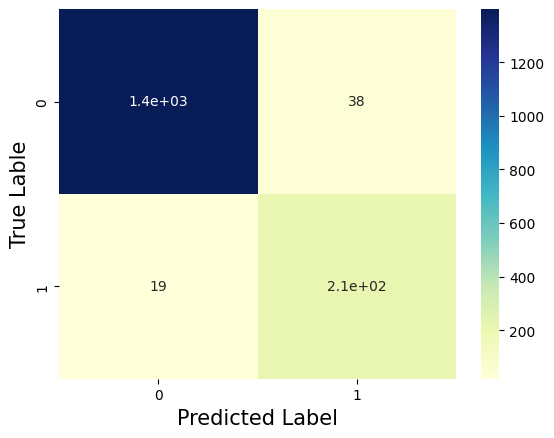

In [184]:
mln=mymodel(MultinomialNB())

Training Accuracy:- 1.0
 Testing Accuracy:-  0.9700239808153477
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1436
        spam       0.99      0.79      0.88       232

    accuracy                           0.97      1668
   macro avg       0.98      0.89      0.93      1668
weighted avg       0.97      0.97      0.97      1668



RandomForestClassifier()

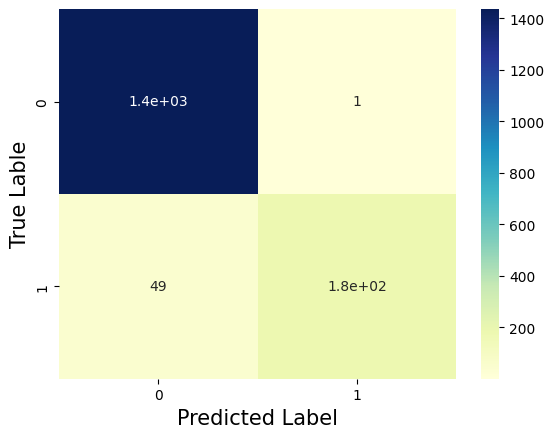

In [185]:
mymodel(RandomForestClassifier())

Training Accuracy:- 0.9956309432022616
 Testing Accuracy:-  0.9676258992805755
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1436
        spam       1.00      0.77      0.87       232

    accuracy                           0.97      1668
   macro avg       0.98      0.88      0.92      1668
weighted avg       0.97      0.97      0.97      1668



SVC()

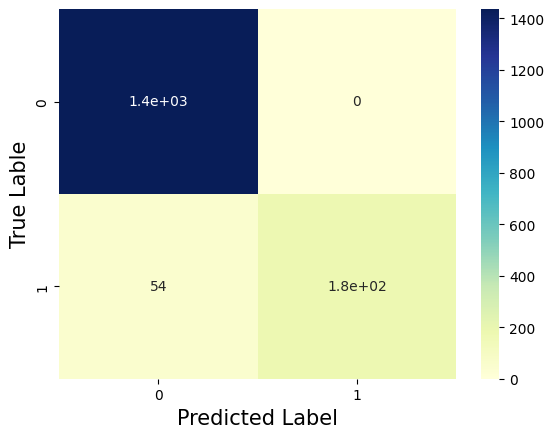

In [186]:
mymodel(SVC())

Training Accuracy:- 0.9352351580570547
 Testing Accuracy:-  0.9106714628297362
              precision    recall  f1-score   support

         ham       0.91      1.00      0.95      1436
        spam       1.00      0.36      0.53       232

    accuracy                           0.91      1668
   macro avg       0.95      0.68      0.74      1668
weighted avg       0.92      0.91      0.89      1668



KNeighborsClassifier()

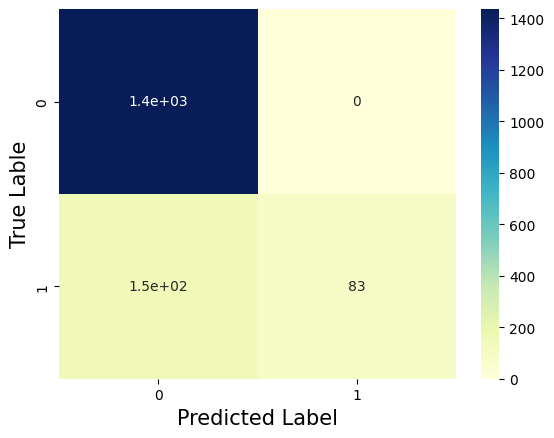

In [187]:
mymodel(KNeighborsClassifier())

In [189]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

Training Accuracy:- 0.9879208429709586
 Testing Accuracy:-  0.9688249400479616
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1436
           1       0.95      0.81      0.88       232

    accuracy                           0.97      1668
   macro avg       0.96      0.90      0.93      1668
weighted avg       0.97      0.97      0.97      1668



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

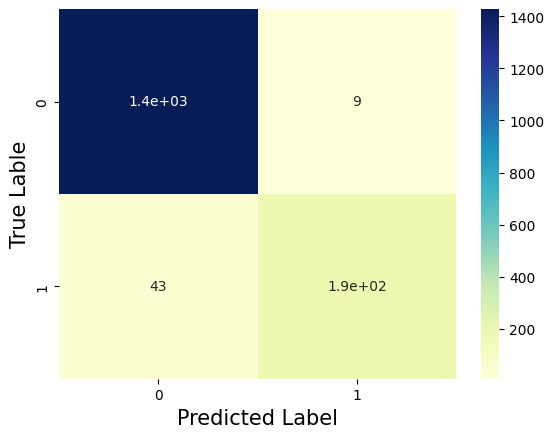

In [190]:
from xgboost import XGBClassifier

XGB=XGBClassifier()
mymodel(XGB)

Training Accuracy:- 1.0
 Testing Accuracy:-  0.9634292565947242
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1436
           1       0.92      0.81      0.86       232

    accuracy                           0.96      1668
   macro avg       0.94      0.90      0.92      1668
weighted avg       0.96      0.96      0.96      1668



DecisionTreeClassifier()

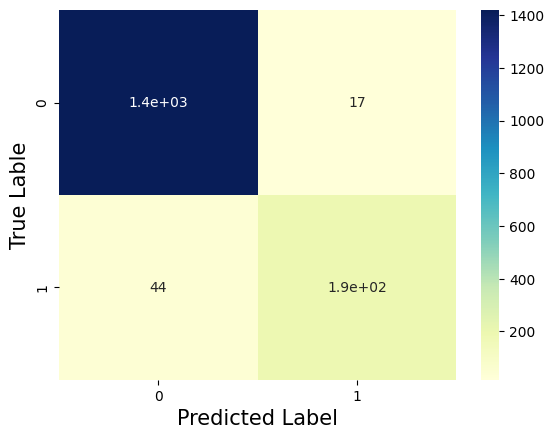

In [191]:
mymodel(DecisionTreeClassifier())

*Lets perform different techniques to handle imbalanced data.*

In [ ]:
# lets import library.
!pip install imblearn

## Undersampling

In [ ]:
# lets import dependencies.
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the class by creating an object of the class.
rus = RandomUnderSampler(random_state = 1)

x_sample1, y_sample1 = rus.fit_resample(xtrain,ytrain)

In [ ]:
y_sample1.value_counts()

ham     529
spam    529
Name: label, dtype: int64

In [ ]:
y_sample1.shape

(1058,)

In [ ]:
y_sample1

0        ham
1        ham
2        ham
3        ham
4        ham
        ... 
1053    spam
1054    spam
1055    spam
1056    spam
1057    spam
Name: label, Length: 1058, dtype: object

In [ ]:
x_sample1

,clean_mail
0,wat time finish
1,oh k got job whats
2,today accept day u accept brother sister lover...
3,working
4,got thing may pub later
...,...
1053,tried contact response offer new nokia fone ca...
1054,pro video club need help info call must club c...
1055,hey boy want hot xxx pic sent direct ur phone ...
1056,auction round highest bid next maximum bid bid...


In [ ]:
x_sample1.shape

(1058, 1)

## As we saw the drawback of the undersampling that it causes loss of data.


### So, to overcome this situation will use Oversampling.
# Oversampling

In [ ]:
# import libraries
from imblearn.over_sampling import RandomOverSampler

# instantiate the class by creating its object
ros = RandomOverSampler(random_state = 1)

x_sample2, y_sample2 = ros.fit_resample(xtrain,ytrain)

In [ ]:
y_sample2.value_counts()

ham     3371
spam    3371
Name: label, dtype: int64

In [ ]:
y_sample2.shape

(6742,)

In [ ]:
y_sample2

0        ham
1        ham
2       spam
3       spam
4        ham
        ... 
6737    spam
6738    spam
6739    spam
6740    spam
6741    spam
Name: label, Length: 6742, dtype: object

In [ ]:
x_sample2

,clean_mail
0,baaaaaaaabe wake miss crave need
1,tired slept well past night
2,received mobile content enjoy
3,double min txts orange tariff latest motorola ...
4,hey inconvenient si huh
...,...
6737,please call customer service representative fr...
6738,rodger burn msg tried call reply sm free nokia...
6739,call germany penny per minute call fixed line ...
6740,important information orange user today lucky ...


In [ ]:
x_sample2.shape

(6742, 1)

In [ ]:
df_over = pd.concat([pd.DataFrame(x_sample2),pd.DataFrame(y_sample2)])

In [ ]:
df_over

,clean_mail,label
0,baaaaaaaabe wake miss crave need,NaN
1,tired slept well past night,NaN
2,received mobile content enjoy,NaN
3,double min txts orange tariff latest motorola ...,NaN
4,hey inconvenient si huh,NaN
...,...,...
6737,NaN,spam
6738,NaN,spam
6739,NaN,spam
6740,NaN,spam


In [ ]:
df_over.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6737     True
6738     True
6739     True
6740     True
6741     True
Length: 13484, dtype: bool

In [ ]:
df_over.duplicated().value_counts()

True     9876
False    3608
dtype: int64

In [ ]:
df_over[df_over.duplicated()]

,clean_mail,label
79,ok,NaN
157,many people seems special first sight remain s...,NaN
166,sorry call later,NaN
198,ok,NaN
206,sorry call later,NaN
...,...,...
6737,NaN,spam
6738,NaN,spam
6739,NaN,spam
6740,NaN,spam


In [ ]:
len(df_over[df_over.duplicated()])

9876

In [ ]:
df_over['label'].value_counts()

ham     3371
spam    3371
Name: label, dtype: int64

## And to overcome of this problem of oversampling which returns duplicate value and causes overfitting, we have new concept called 'SMOTE' which will to over the drawback of both these Sampling.

# SMOTE
*Where SMOTE is one of the technique of Oversampling.*

In [ ]:
ytrain

4393     ham
216      ham
4471    spam
3889    spam
5030     ham
        ... 
905      ham
5192     ham
3980     ham
235      ham
5157     ham
Name: label, Length: 3900, dtype: object

In [ ]:
ytest

1078     ham
4028     ham
958      ham
4642     ham
4674    spam
        ... 
3954     ham
619      ham
1987     ham
2358     ham
3594     ham
Name: label, Length: 1672, dtype: object

In [ ]:
# # lets just perform label encoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# ytrain = le.fit_transform(ytrain)
# ytest = le.transform(ytest)

In [ ]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [ ]:
ytrain

4393     ham
216      ham
4471    spam
3889    spam
5030     ham
        ... 
905      ham
5192     ham
3980     ham
235      ham
5157     ham
Name: label, Length: 3900, dtype: object

In [ ]:
# import dependency
from imblearn.over_sampling import SMOTEN

#  instantiate the class bt creating an object.
sm = SMOTEN()
# here sampling_strategy is set to 'minority'
# where it will use knn approach to get,
# slighty different records from the original records
x_sample3, y_sample3 = sm.fit_resample(xtrain,ytrain)

In [ ]:
y_sample3.value_counts()

ham     3371
spam    3371
Name: label, dtype: int64

In [ ]:
y_sample3.shape

(6742,)

In [ ]:
y_sample3

0        ham
1        ham
2       spam
3       spam
4        ham
        ... 
6737    spam
6738    spam
6739    spam
6740    spam
6741    spam
Name: label, Length: 6742, dtype: object

In [ ]:
x_sample3

,clean_mail
0,baaaaaaaabe wake miss crave need
1,tired slept well past night
2,received mobile content enjoy
3,double min txts orange tariff latest motorola ...
4,hey inconvenient si huh
...,...
6737,get ur ringtone free reply msg tone top tone p...
6738,get ur ringtone free reply msg tone top tone p...
6739,get ur ringtone free reply msg tone top tone p...
6740,get ur ringtone free reply msg tone top tone p...


In [ ]:
x_sample3.shape

(6742, 1)

In [ ]:
Haaa tham
